In [1]:
import pandas as pd
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

2024-02-19 18:45:14.317955: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data = pd.read_csv("../data/fashion-mnist_train.csv")
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_data = pd.read_csv("../data/fashion-mnist_test.csv")
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("Training data shape: ", train_data.shape)
print("Testing data shape: ", test_data.shape)

Training data shape:  (60000, 785)
Testing data shape:  (10000, 785)


In [5]:
print("Training data distribution")
print(train_data.label.value_counts())

print("Testing data distribution")
print(test_data.label.value_counts())

Training data distribution
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64
Testing data distribution
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64


In [6]:
y_train = train_data.label
x_train = train_data.drop(columns=['label'])

x_train = x_train.to_numpy().reshape(60000, 28, 28)

y_test = test_data.label
x_test = test_data.drop(columns=['label'])

x_test = x_test.to_numpy().reshape(10000, 28, 28)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 4s 5ms/step - loss: 3.3024 - accuracy: 0.6812 - val_loss: 0.9024 - val_accuracy: 0.7052
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 0.8302 - accuracy: 0.7229 - val_loss: 0.8260 - val_accuracy: 0.7070
Epoch 3/100
750/750 [==============================] - 3s 4ms/step - loss: 0.6976 - accuracy: 0.7551 - val_loss: 0.6984 - val_accuracy: 0.7631
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 0.6218 - accuracy: 0.7760 - val_loss: 0.6180 - val_accuracy: 0.7839
Epoch 5/100
750/750 [==============================] - 3s 4ms/step - loss: 0.5701 - accuracy: 0.7951 - val_loss: 0.5451 - val_accuracy: 0.8094
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 0.5126 - accuracy: 0.8151 - val_loss: 0.4993 - val_accuracy: 0.8271
Epoch 7/100
750/750 [==============================] - 3s 4ms/step - loss: 0.5161 - accuracy: 0.8183 - val_loss: 0.5031 - val_accuracy: 0.8330

Epoch 58/100
750/750 [==============================] - 4s 6ms/step - loss: 0.1938 - accuracy: 0.9320 - val_loss: 0.5196 - val_accuracy: 0.8778
Epoch 59/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1893 - accuracy: 0.9326 - val_loss: 0.5492 - val_accuracy: 0.8626
Epoch 60/100
750/750 [==============================] - 4s 6ms/step - loss: 0.1961 - accuracy: 0.9311 - val_loss: 0.6011 - val_accuracy: 0.8802
Epoch 61/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1877 - accuracy: 0.9319 - val_loss: 0.4963 - val_accuracy: 0.8715
Epoch 62/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1913 - accuracy: 0.9326 - val_loss: 0.4898 - val_accuracy: 0.8799
Epoch 63/100
750/750 [==============================] - 4s 6ms/step - loss: 0.1859 - accuracy: 0.9347 - val_loss: 0.5223 - val_accuracy: 0.8749
Epoch 64/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1881 - accuracy: 0.9342 - val_loss: 0.4848 - val_accuracy:

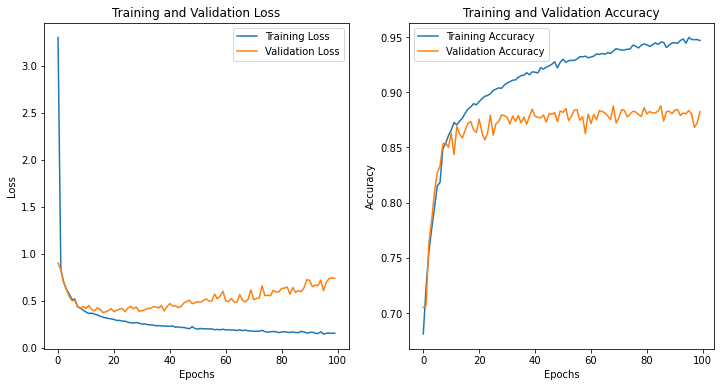

In [11]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Deduction

From the graph we can see that the total epochs for best case is 15. So we will fix epochs to 15 and train the model again.

In [12]:
model_final = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model_final.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model_final.fit(x_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 9s 6ms/step - loss: 2.5559 - accuracy: 0.6953 - val_loss: 0.6819 - val_accuracy: 0.7223
Epoch 2/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5880 - accuracy: 0.7818 - val_loss: 0.5434 - val_accuracy: 0.8008
Epoch 3/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5006 - accuracy: 0.8232 - val_loss: 0.5410 - val_accuracy: 0.8062
Epoch 4/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4712 - accuracy: 0.8330 - val_loss: 0.5467 - val_accuracy: 0.8111
Epoch 5/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4556 - accuracy: 0.8400 - val_loss: 0.4194 - val_accuracy: 0.8577
Epoch 6/15
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4220 - accuracy: 0.8514 - val_loss: 0.4629 - val_accuracy: 0.8362
Epoch 7/15
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4087 - accuracy: 0.8559 - val_loss: 0.4870 - val_accurac

In [15]:
model_final.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3806 - accuracy: 0.8762


[0.38061732053756714, 0.8762000203132629]